## どの話でどの文末表現が多く使用されているか．

In [1]:
import os
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
path = os.getcwd()
print(path)


/home/access/work


In [2]:
df = pd.read_csv('./data/comments_takopi.csv')

content_idとメッセージの抽出  
df.loc[:,['A','B']]

In [3]:
df_content_id_comment_list = df.loc[:,['content_id','message']]
# df_content_id_comment_list

messageの分類．特定語尾のメッセージだけを取り出す．

In [4]:
df_message = df['message']
# df_message
#type(df_message)

In [5]:
#df_草 = df_message.str.extract('(草|笑)$',expand=True)
df_草_sum = df_message.str.endswith('草').sum()

In [6]:
df_草_sum

492

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84241 entries, 0 to 84240
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   content_id   84241 non-null  int64 
 1   user_id      84241 non-null  int64 
 2   inserted_at  84241 non-null  object
 3   like_count   84241 non-null  int64 
 4   message      84241 non-null  object
dtypes: int64(3), object(2)
memory usage: 3.2+ MB


In [8]:
df_end_of_sentence = df_message.str.extract('.*(草|笑|。。。|w|、、、|\.\.\.|\!|\?|！|？)$',expand=True).dropna(how='all')
print(df_end_of_sentence.count())
print(df_end_of_sentence)

0    21808
dtype: int64
         0
4        !
6        ！
7      。。。
10       ？
13       ？
...    ...
84222    w
84224    ！
84226    ？
84227    ！
84229  ...

[21808 rows x 1 columns]


In [9]:
df_message = df_message.str.rstrip('\n')#改行を除去

In [10]:
df_hoge = df_message[df_message.str.match('.*(草|笑|。。。|w|W|、、、|\.\.\.|\!|\?|！|？)$')]#マッチしたdataframeが帰る
print(df_hoge)
df_hoge.count()
#抽出できた．

4                                      面白いけど流石にエグすぎるかも...!
6                            ハッピーエンドになってほしいなってほしいたのむ！！！！！！
7                                                    おも。。。
10                                                  エグゥッ！？
13                                  最高にハッピーな小学生人間ドラマ、、、？？？
                               ...                        
84217                                           タコピーマジか...
84222                                         面白んだけど辛いわwww
84224                                            つまり、、？え？！
84227                               タコピー、なんでカメラで殴ったんだよォぉお！
84229    東くんひたすらお前はダメだ、できないと言われ続けたらあんな言葉かけられてやらないわけないよな...
Name: message, Length: 16860, dtype: object


16860

In [11]:
#タコピー全体のdf_messageを使用する．
#漫画全体で特定の末尾使用数（こちらで手動特定）でグラフ

strs = ['草','笑','。。。','w','W','、、、','\.\.\.','\!','\?','！','？','芝']

def counter(str):
    count = 0
    pattern = re.compile('.*' + str + '$')
    count = df_message[df_message.str.match(pattern)].count()
    return count

sum = 0
counter_dict = {}

for i in strs:
    counter_dict[i] = counter(i)
    #sum += count
    
print(counter_dict)
#counter_df = pd.DataFrame.from_dict(counter_dict)

{'草': 475, '笑': 228, '。。。': 179, 'w': 589, 'W': 6, '、、、': 662, '\\.\\.\\.': 940, '\\!': 290, '\\?': 209, '！': 6898, '？': 6384, '芝': 0}


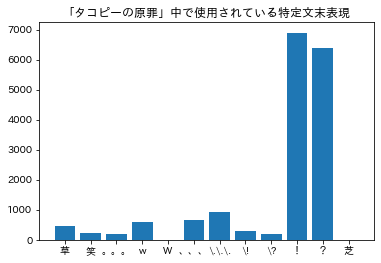

In [12]:
x = counter_dict.keys()
plt.title("「タコピーの原罪」中で使用されている特定文末表現")
plt.bar(x, counter_dict.values(), tick_label=list(counter_dict.keys()))
plt.show()

In [13]:
#全漫画で使用されている文末表現


In [25]:
#1漫画毎のメッセージを取得

content = pd.read_csv('./data/contents.csv')
comment = pd.read_csv('./data/comments.csv')
work_ids = content['work_id'].unique()
print(work_ids)
df_con_temp = content[['work_id','content_id','work_name']]
df_w_m = comment.merge(df_con_temp, on=['content_id'])#work_idとmessageを紐付け
df_w_m

[   363    530   1303   2159   2318 102085]


,content_id,user_id,inserted_at,like_count,message,work_id,work_name
0,1016369,298364,2021-10-31 15:00:16,22176,アニメ化おめでとう！！！！！,1303,SPY×FAMILY
1,1016369,219064,2021-10-31 15:00:30,1387,アニメ化おめでとう！！まじか？！,1303,SPY×FAMILY
2,1016369,103248838,2021-10-31 15:00:35,13940,遂にアニメ化来た！おめでとう！！！！,1303,SPY×FAMILY
3,1016369,35688635,2021-10-31 15:00:40,1,やっぱりアニメ化か！おめでとうございます🎊,1303,SPY×FAMILY
4,1016369,1213862,2021-10-31 15:00:41,1,おめでとうアニメ化！アーニャ可愛いなぁ,1303,SPY×FAMILY
...,...,...,...,...,...,...,...
101208,1026940,102890807,2022-03-31 08:50:27,0,お湯をかければ元に戻るのは らんまリスペクトかな,102085,ダンダダン
101209,1026940,38473504,2022-03-31 08:55:59,0,えぇーーー,102085,ダンダダン
101210,1026940,1848537,2022-03-31 09:27:27,0,キャラデザすごすぎぃ…ウルト○マンに出てくる怪獣みたいに洗練されてるじゃん…,102085,ダンダダン
101211,1026940,812330,2022-03-31 10:18:28,0,ジジは何食べてそんなにデカくなったんだ,102085,ダンダダン


In [58]:
df_w = df_w_m.groupby('work_id')
df_w.get_group(363)
strs = ['草','笑','。。。','w','W','、、、','\.\.\.','\!','\?','！','？']

ls = list()

for w in work_ids:
    df = df_w.get_group(w)
    df_message = df['message']
    counter_dict = {}
    
    for str in strs:
        pattern = re.compile('.*' + str + '$')
        count = df_message[df_message.str.match(pattern)].count()#マッチした個数を返す
        counter_dict[str] = counter(str)#辞書に放り込む
    ls.append(counter_dict)
    
    #ls.append(counter_dict)
ls[0]

{'草': 84,
 '笑': 44,
 '。。。': 5,
 'w': 173,
 'W': 0,
 '、、、': 22,
 '\\.\\.\\.': 28,
 '\\!': 22,
 '\\?': 12,
 '！': 300,
 '？': 413}

<BarContainer object of 11 artists>

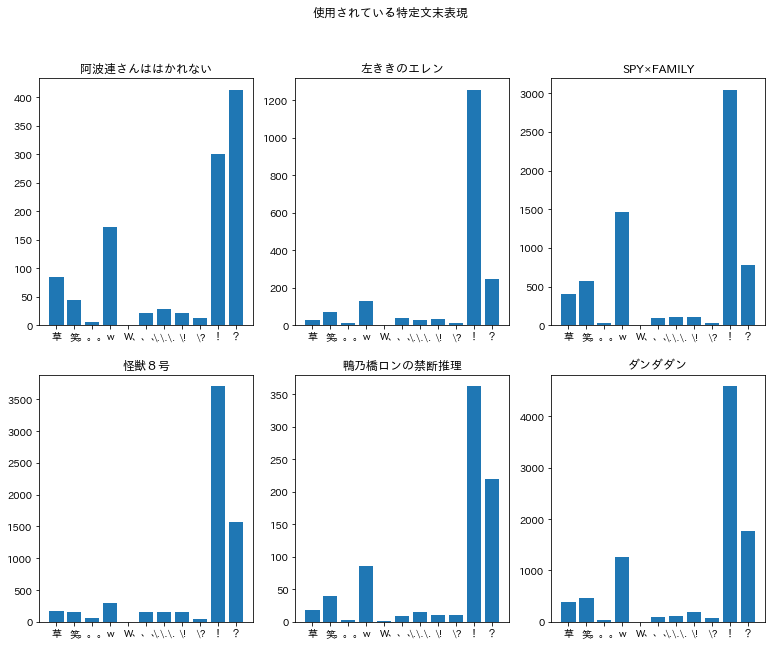

In [68]:
Figure = plt.figure(figsize=(13,10))#全体のグラフ作成
#plt.title('使用されている特定文末表現')#これだめ．
plt.suptitle("使用されている特定文末表現")

ax0 = Figure.add_subplot(2,3,1)
ax1 = Figure.add_subplot(2,3,2)
ax2 = Figure.add_subplot(2,3,3)
ax3 = Figure.add_subplot(2,3,4)
ax4 = Figure.add_subplot(2,3,5)
ax5 = Figure.add_subplot(2,3,6)

x0 = ls[0].keys()
x1 = ls[1].keys()
x2 = ls[2].keys()
x3 = ls[3].keys()
x4 = ls[4].keys()
x5 = ls[5].keys()

ax0.set_title('阿波連さんははかれない')
ax1.set_title('左ききのエレン')
ax2.set_title('SPY×FAMILY')
ax3.set_title('怪獣８号')
ax4.set_title('鴨乃橋ロンの禁断推理')
ax5.set_title('ダンダダン')

ax0.bar(x0, ls[0].values(), tick_label=list(ls[0].keys()))
ax1.bar(x1, ls[1].values(), tick_label=list(ls[1].keys()))
ax2.bar(x2, ls[2].values(), tick_label=list(ls[2].keys()))
ax3.bar(x3, ls[3].values(), tick_label=list(ls[3].keys()))
ax4.bar(x4, ls[4].values(), tick_label=list(ls[4].keys()))
ax5.bar(x5, ls[5].values(), tick_label=list(ls[5].keys()))